<a href="https://colab.research.google.com/github/GabeMaldonado/JupyterNotebooks/blob/master/Prophet_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Detecting Trend Changes



In [0]:
import pandas as pd 
import numpy as np 
from fbprophet import Prophet


## Load Data

Load Hospitality dataset

In [0]:
df = pd.read_csv('HospitalityEmployees.csv')

In [0]:
# rename columns to Prophet specs
# Change date to time series

df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

In [4]:
df.head()

,ds,y
0,1990-01-01,1064.5
1,1990-02-01,1074.5
2,1990-03-01,1090.0
3,1990-04-01,1097.4
4,1990-05-01,1108.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
ds    348 non-null datetime64[ns]
y     348 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.5 KB


In [6]:
df.describe()

,y
count,348.000000
mean,1452.506897
std,256.604914
min,1064.500000
25%,1238.050000
50%,1436.200000
75%,1586.300000
max,2022.100000


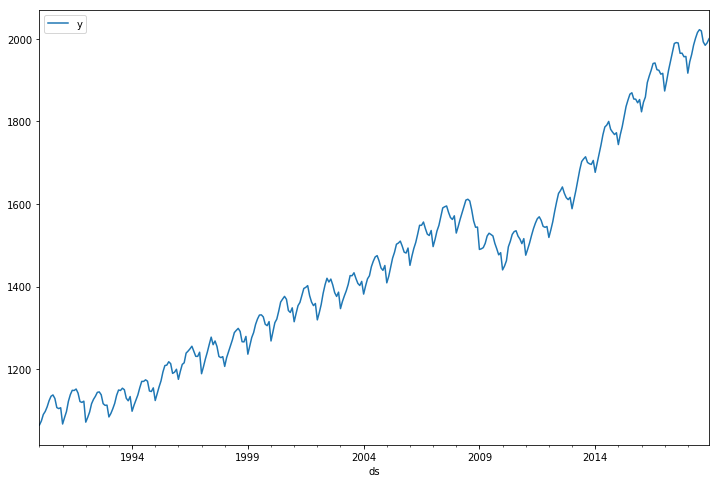

In [8]:
# plot data
pd.plotting.register_matplotlib_converters()
df.plot(x='ds', y='y', figsize=(12,8))

## Create Model


In [9]:
m = Prophet()

# fit entire df tomodel 

m.fit(df)

# create future placeholder -- forecast 12 periods into future

future = m.make_future_dataframe(periods=12, freq='MS')

# forecast

forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


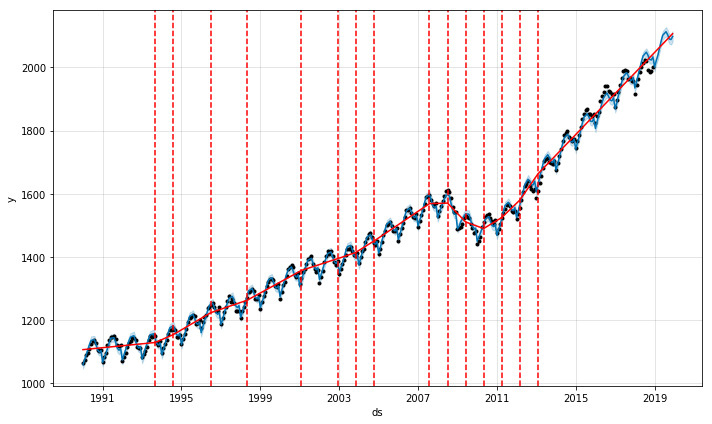

In [11]:
from fbprophet.plot import add_changepoints_to_plot

# take model and plot forecast
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)   # gca = get current axis